In [118]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [119]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('Australia/Sydney')

In [278]:
strava.head() 

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-03 07:47:51+11:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 12:36:53+11:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 13:56:00+11:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 16:37:04+11:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-06 06:22:46+11:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [121]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [122]:
joining_df = strava.join(cheetah, how='inner') 
joining_df

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-01 08:13:34+11:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.000000,0.0000
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


## 1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides 

In [269]:
remove_df = joining_df[joining_df.device_watts==True]
remove_df

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## 2. Look at the distributions of some key variables: time, distance, average speed, average power, TSS. 
## Are they normally distributed? Skewed? 

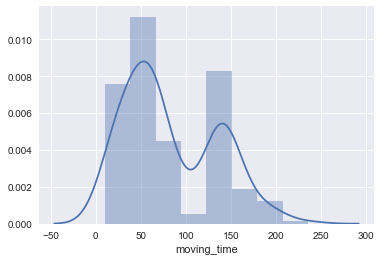

In [125]:
sns.distplot(remove_df['moving_time']) 
## The graph shows right-skewed and some unusual low data at 100-150 range.

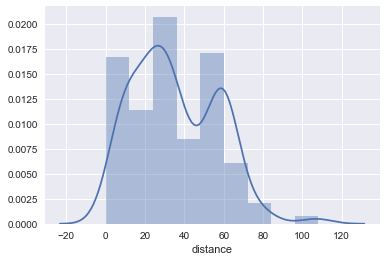

In [126]:
sns.distplot(remove_df['distance']) 
## The graph shows right-skewed 

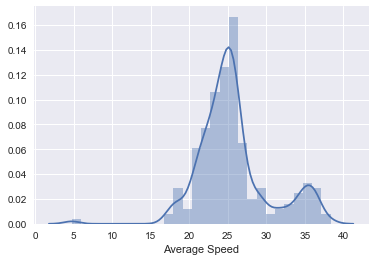

In [127]:
sns.distplot(remove_df['Average Speed']) 
## The graph shows relatively normally distributed with a bit left-skewed 

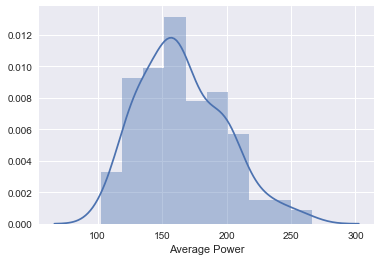

In [128]:
sns.distplot(remove_df['Average Power']) 
## The graph shows relatively normally distributed. 

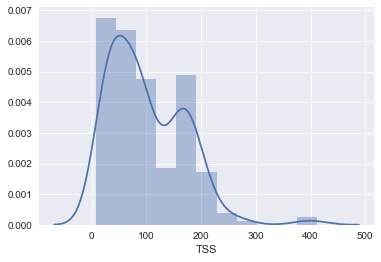

In [129]:
sns.distplot(remove_df['TSS'])
## The graph shows right skewed. 

#### Conclusion: 
##### Except for Average Power, other variables follow the same pattern of declining in the middle and then rise back up. 

## 3. Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?

In [130]:
remove_df.corr() 

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
average_heartrate,1.000000,-0.062079,0.672457,0.078131,-0.124327,0.359824,-0.079929,0.628384,0.628382,0.097848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578104,0.578105,0.080077
average_temp,-0.062079,1.000000,-0.275660,0.051771,0.085515,0.001101,0.104961,-0.209984,-0.209984,0.014060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.198613,-0.198615,0.015503
average_watts,0.672457,-0.275660,1.000000,0.031858,-0.161617,0.245937,-0.112507,0.885686,0.885685,0.183106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.772574,0.772574,0.150163
distance,0.078131,0.051771,0.031858,1.000000,0.942570,0.752259,0.972260,0.162384,0.162386,0.905587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202935,0.202938,0.920085
elapsed_time,-0.124327,0.085515,-0.161617,0.942570,1.000000,0.669028,0.975825,-0.004394,-0.004391,0.847576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078593,0.078596,0.877421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rest HF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HRV Recovery Points,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NP,0.578104,-0.198613,0.772574,0.202935,0.078593,0.384543,0.092046,0.957003,0.957004,0.431900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.425102
IF,0.578105,-0.198615,0.772574,0.202938,0.078596,0.384546,0.092048,0.957004,0.957004,0.431901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.425103


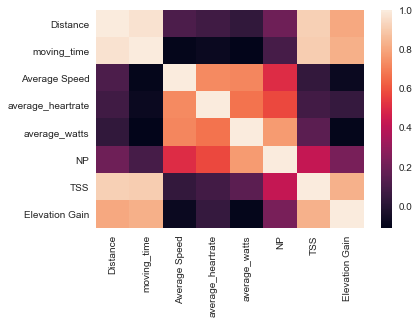

In [131]:
relationship = remove_df[['Distance','moving_time','Average Speed','average_heartrate','average_watts','NP',
            'TSS','Elevation Gain']].corr()
sns.heatmap(relationship)
#From the map we can see that there are 2 groups of correlation. The first group is 4 corners (2 variables each)  
#having high correlation. These are:
#  Distance - moving_time 
#  Distance - TSS 
#  Distance - Elevation Gain 
#  TSS - Elevation Gain
#  TSS - moving_time 
#  Elevation Gain - moving_time 

#The second group is the middle rectangle having lower rate of correlation to the first one, consisting of:  
##  Average Speed 
##  Average heartrate 
##  Average watts 
##  NP 

#Both groups' variables have nearly no correlation to each other at all. This can be explained by the 
#varibles in each groups themselves. For example: Distance and moving time is highly correlated
#due to the fact that the longer the distance the longer the time, meanwhile Average Speed only depends on the 
#terrain of the ride. 


## 4. We want to explore the differences between the three categories: Race, Workout and Ride.
#### Use scatter plots with different colours for each category to explore how these categories differ.
#### Use histograms or box plots to visualise the different distributions of a variable for the three categories.
#### In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are   interesting, show us a representative example).

In [132]:
race_df = remove_df[remove_df.workout_type=='Race']
workout_df = remove_df[remove_df.workout_type=='Workout'] 
ride_df = remove_df[remove_df.workout_type=='Ride'] 
#Creating data frame for each of the workout types 

### Scatter plots 
#### From the previous heatmap, we can see that "moving time" and "TSS" are highly correlated. Therefore it is suitable to choose them for scatterplot comparison between the workout types. 

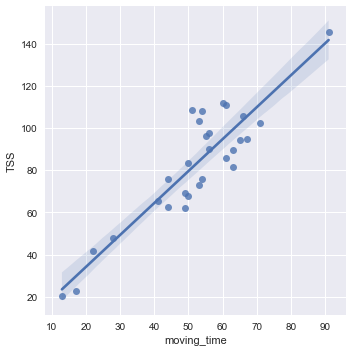

In [133]:
sns.lmplot(x = 'moving_time',y = 'TSS', data = race_df) 

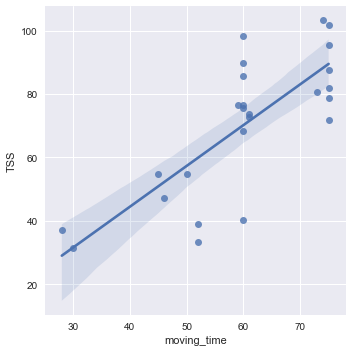

In [134]:
sns.lmplot(x = 'moving_time',y = 'TSS', data = workout_df) 

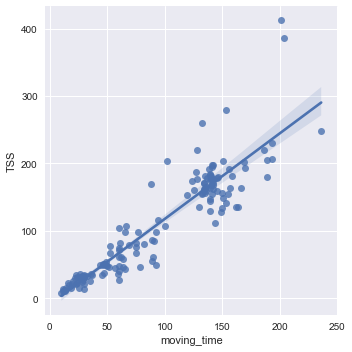

In [135]:
sns.lmplot(x = 'moving_time',y = 'TSS', data = ride_df) 

#### From the scatter plots, it can be seen that the Race has the most consistent plot out of the 3 (which might be due to low number of variables) while Workout has more outliers than others with vertical plot rather than linear. 

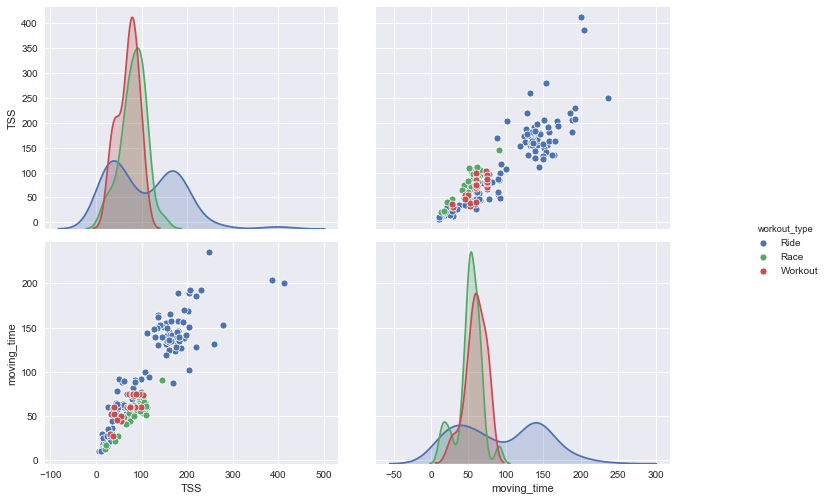

In [283]:
g = sns.pairplot(remove_df, vars=['TSS','moving_time'], hue='workout_type')
g.fig.set_size_inches(12,7)

### Boxplots
#### By picking avarage watts and NP, the difficulty of each workout types can be shown

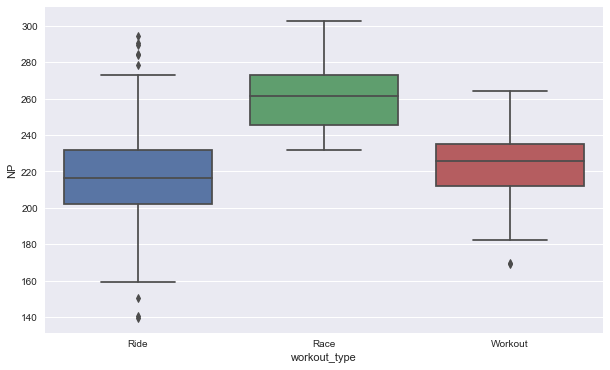

In [136]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'workout_type', y = 'NP', data = remove_df) 

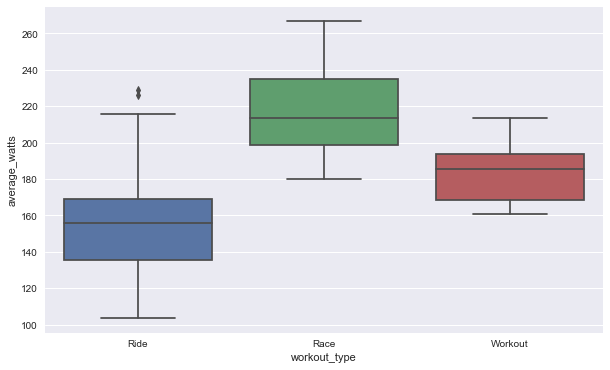

In [137]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'workout_type', y = 'average_watts', data = remove_df) 

#### From both boxplots, Race seems to be the hardest type of riding since it has the highest number of both Normalised Power and Average Watts. 

## 5. Exploring relationship between `rides` and `weather`.

#### a. Merging weather data 

In [138]:
#Preparing 2018 and 2019 weather data
weather_2018 = pd.read_csv('data/weather_data_2018.csv')
weather_2018.rename(columns = {'Year': 'year', 'Month': 'month', 'Day': 'day', 'Maximum temperature (Degree C)': 'temp'}, inplace = True)
weather_2018['date']=pd.to_datetime(weather_2018[['year','month','day']])
weather_2018 = weather_2018[['date','temp']] 
weather_2018.set_index('date', inplace = True) 

In [143]:
weather_2019 = pd.read_csv('data/weather_data_2019.csv')
weather_2019.rename(columns = {'Year': 'year', 'Month': 'month', 'Day': 'day', 'Maximum temperature (Degree C)': 'temp'}, inplace = True)
weather_2019['date']=pd.to_datetime(weather_2019[['year','month','day']])
weather_2019 = weather_2019[['date','temp']] 
weather_2019.set_index('date', inplace = True)


In [274]:
#Merging both years to make one data set 
we_join = pd.concat([weather_2018, weather_2019]) 
we_join.dropna(inplace = True)
we_join.reset_index(inplace = True) 
we_join

,date,temp
0,2018-01-01,30.9
1,2018-01-02,28.8
2,2018-01-03,25.3
3,2018-01-04,25.4
4,2018-01-05,28.9
...,...,...
723,2019-12-27,30.1
724,2019-12-28,33.8
725,2019-12-29,30.7
726,2019-12-30,33.2


#### b. Merging weather and riding data

In [270]:
#Reset index to make datetime into a seperate column for merging 
remove_df.reset_index(inplace = True) 

In [272]:
#Renaming the date columns for easy reading
remove_df.rename(columns = {'index': 'date'})

,date,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
0,2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
1,2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2,2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
3,2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
4,2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
201,2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
202,2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
203,2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


In [273]:
#Reset the data type for merging 
remove_df.loc[:,'date'] = pd.to_datetime(remove_df['date']) 

/Users/nam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [276]:
we_ride = pd.merge(remove_df,we_join, on = ['date'], how = 'inner') 
we_ride

,index,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,temp
0,2018-01-28 06:39:49+11:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,...,0,0,0,0,0,0,222.856,0.831550,20.2257,30.7
1,2018-01-28 07:01:32+11:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,...,0,0,0,0,0,0,245.365,0.915540,94.5787,30.7
2,2018-02-06 08:06:42+11:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,...,0,0,0,0,0,0,253.702,0.946650,98.3269,28.2
3,2018-02-07 17:59:05+11:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,...,0,0,0,0,0,0,232.644,0.868080,171.0780,28.1
4,2018-02-10 06:18:03+11:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,...,0,0,0,0,0,0,212.726,0.793750,147.7970,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2019-07-20 06:22:49+10:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,...,0,0,0,0,0,0,222.988,0.832045,159.3630,20.6
201,2019-07-27 06:12:56+10:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,...,0,0,0,0,0,0,236.028,0.880701,183.1140,20.3
202,2019-07-28 06:42:59+10:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,...,0,0,0,0,0,0,212.020,0.791118,51.1646,19.3
203,2019-07-28 07:47:24+10:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,...,0,0,0,0,0,0,267.699,0.998877,83.5620,19.3


#### c. Distance and Temperature

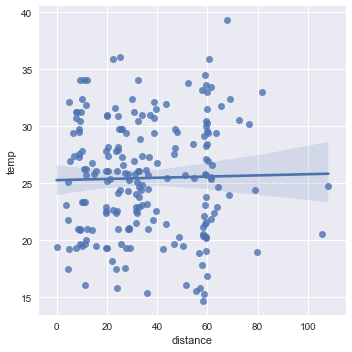

In [277]:
sns.lmplot(x = 'distance',y = 'temp', data = we_ride) 

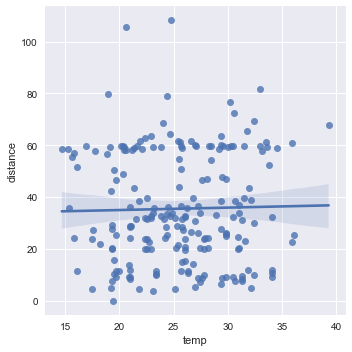

In [280]:
sns.lmplot(x = 'temp',y = 'distance', data = we_ride) 

### From the two scatter plots above with both variables being the predictor and response variables, we can see that the plots don't follow any linear patterns. Therefore, distance and temperature relate to each other is unlikely. 

#### d. Average Speed and Temperature 

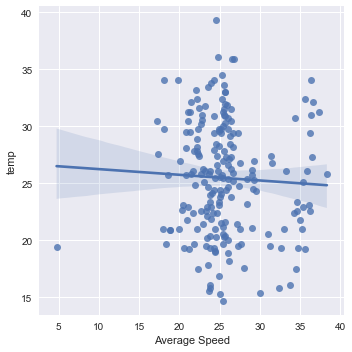

In [279]:
sns.lmplot(x = 'Average Speed',y = 'temp', data = we_ride) 

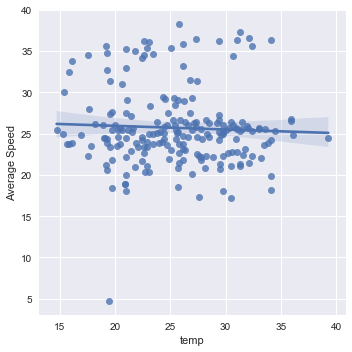

In [282]:
sns.lmplot(x = 'temp',y = 'Average Speed', data = we_ride) 

### The result is the same as distance and temperature. Relationship is unlikely. 